#CardioHealth Insights
###The Idea:
Imagine using a Machine Learning Model that looks at medical information from lots of people. This Model could predict if someone is at risk of getting heart problems. Knowing this could help people take steps to stay healthy.

###Why it Matters:
A kind of heart disease called ischemic heart disease is a leading cause of death. It's responsible for about 16% of all deaths. The good news is many things that make these heart problems more likely can be prevented.

###About the Data:
This information is about a group of diseases that affect the heart and blood vessels, like heart attacks and strokes. These diseases are a major cause of death worldwide and are often linked to how people live (like smoking or not exercising) and their family history.

###The Data Details:
The information about each person includes things like age, gender, height, weight, blood pressure, cholesterol levels, and lifestyle habits (like smoking or exercise). The goal is to figure out if someone has heart problems or not.

###What We Can Do:
We can use this data to train a machine learning model to make predictions. It would learn from the patterns in the information to tell us if someone is likely to have heart issues or not. Using this data to train a machine learning model can be helpful by enabling early identification of individuals at risk of heart issues, allowing for timely interventions and personalized health recommendations.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from tabulate import tabulate

In [5]:
# Loading the Data using pandas dataframe
data = pd.read_csv('/content/drive/MyDrive/cardio_train.csv',sep=";")
df = pd.DataFrame(data)

In [6]:
#Shape of our DF
print(df.shape)
#Prints first 5 rows for our glance
df

(70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [7]:
#prints information about the DF. no. of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values)
df.info()
#returns description of the data in the DataFrame. Like Count, Mean, SD, min, percentiles, max.
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
                 id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349571    1

# Data Pre Processing

In [8]:
#Dropping the unwanted ID Column
df.drop(['id'], axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [10]:
# Units of measurement
# age -> days so let's change it to years
df['age'] = df['age'] // 365

In [11]:
#Check the Duplicate values
df.duplicated().sum()

3208

In [12]:
#Drop all the Duplicates present in the dataframe
df.drop_duplicates(inplace=True)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69994,57,1,165,80.0,150,80,1,1,0,0,1,1
69996,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [13]:
# Check for missing values
print(df.isnull().sum())

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


### Checking for data imbalance

In [14]:
df['cardio'].value_counts()

1    34193
0    32599
Name: cardio, dtype: int64

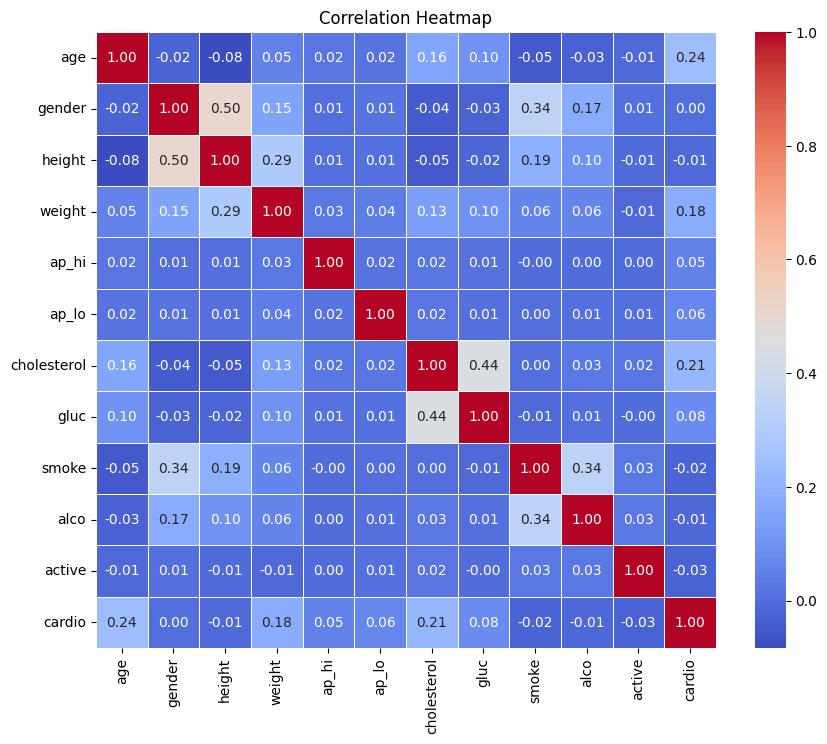

In [15]:
#Representation of how strongly variables are correlated with each other
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

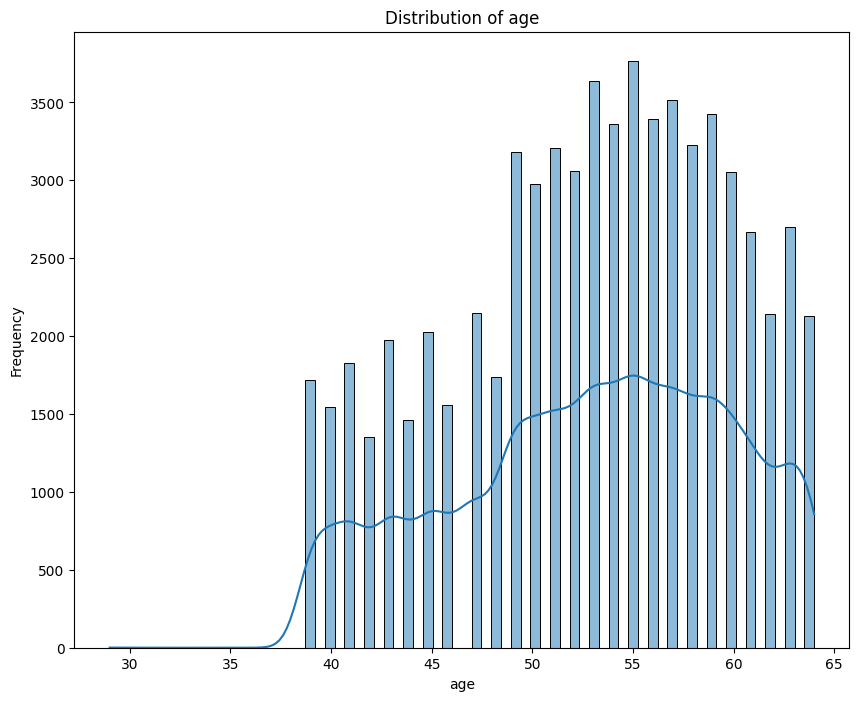

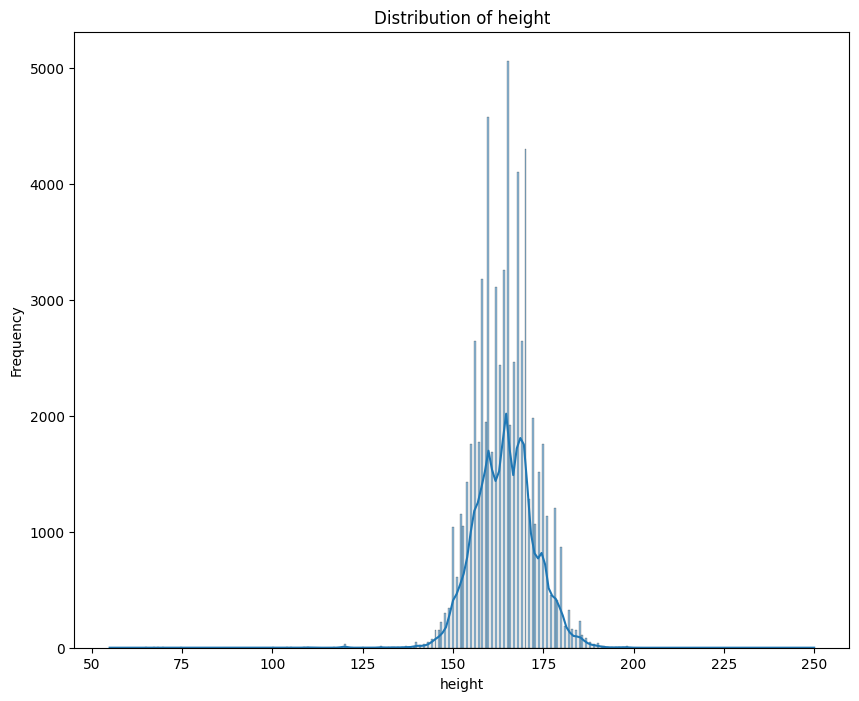

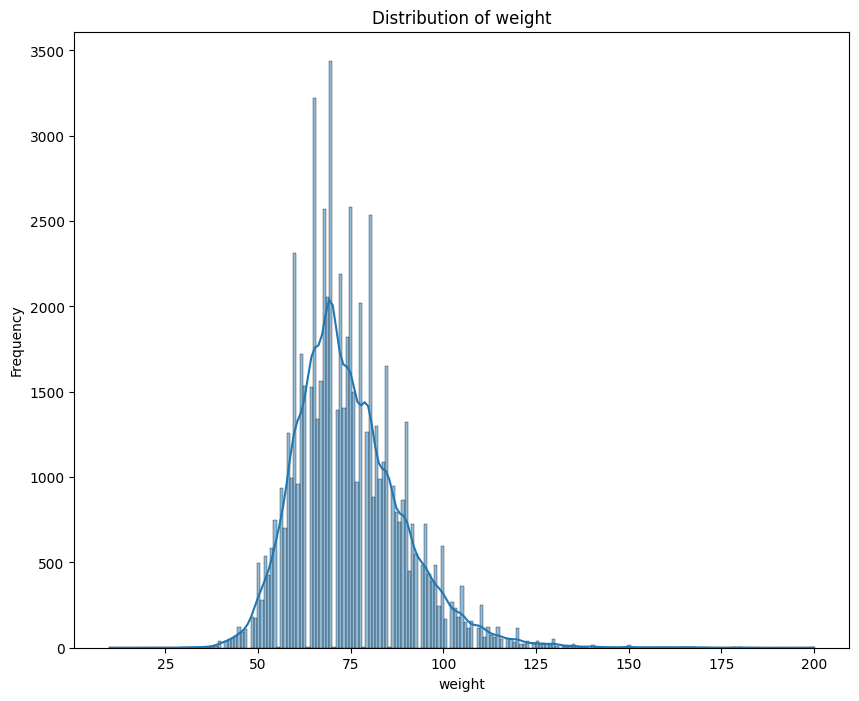

In [16]:
#visualize the distribution of age, height, weight
numerical_features = ['age', 'height', 'weight']

for feature in numerical_features:
    plt.figure(figsize=(10, 8))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

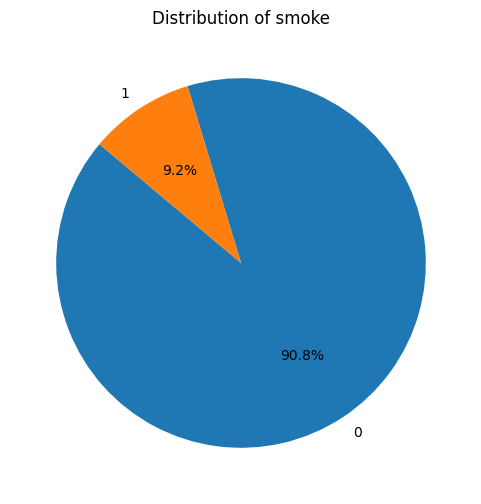

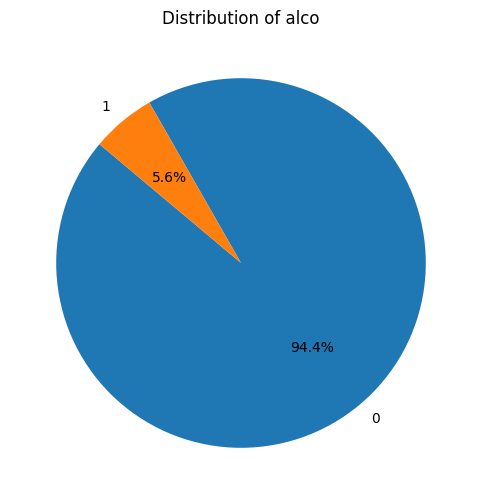

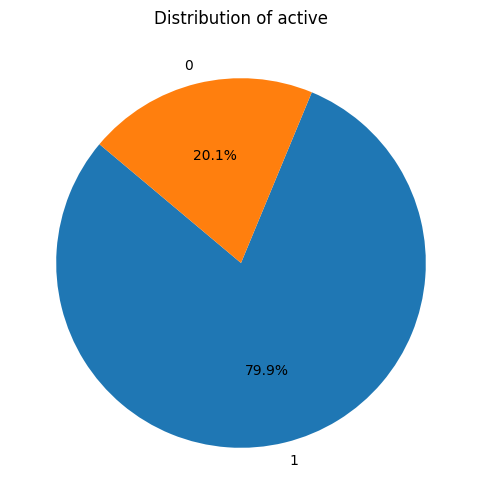

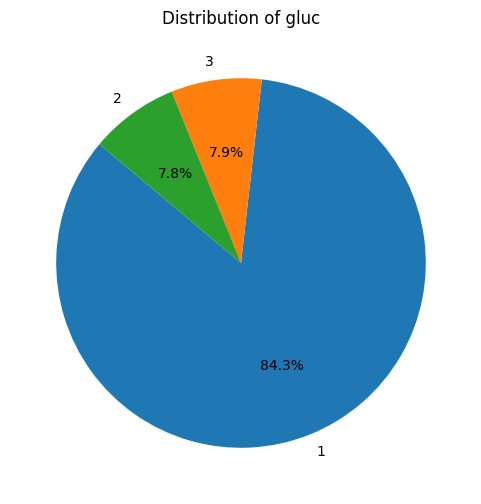

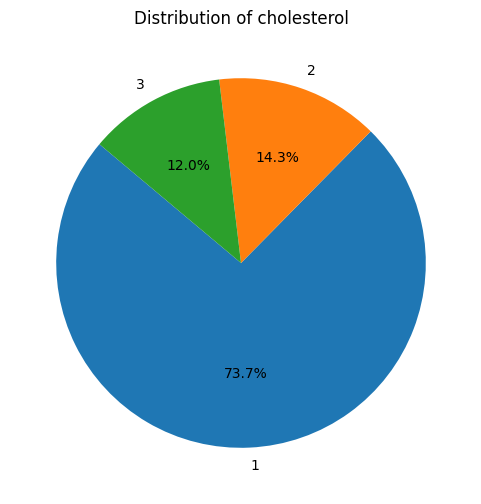

In [17]:
import matplotlib.pyplot as plt

#visualize the distribution of smoke, alco, active
binary_features = ['smoke', 'alco', 'active','gluc','cholesterol']

for feature in binary_features:
    plt.figure(figsize=(6,6))
    plt.pie(df[feature].value_counts(), labels=df[feature].value_counts().index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of {feature}')
    plt.show()


In [18]:
#We divide our data in X which contains all columns and y which contains target i.e cardio
X = df.drop(columns=["cardio"])
y = df["cardio"]

# Split the data into training and test sets using 80% train and 20% test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)


(53433, 11)
(53433,)
(13359, 11)


# Training Different Models

## Decison Tree


In [20]:
#Training Decision Tree
DT_clf = DecisionTreeClassifier(max_depth=3)
DT_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [21]:
#Testing Decision tree and checking accuracy
y_pred = DT_clf.predict(X_test)
results = pd.DataFrame()
results['actual'] = y_test
results['predicted'] = DT_clf.predict(X_test)
results

,actual,predicted
29673,0,0
14770,0,0
24701,1,1
61302,1,1
50641,0,0
...,...,...
44083,1,0
11920,1,1
36798,1,1
59458,1,1


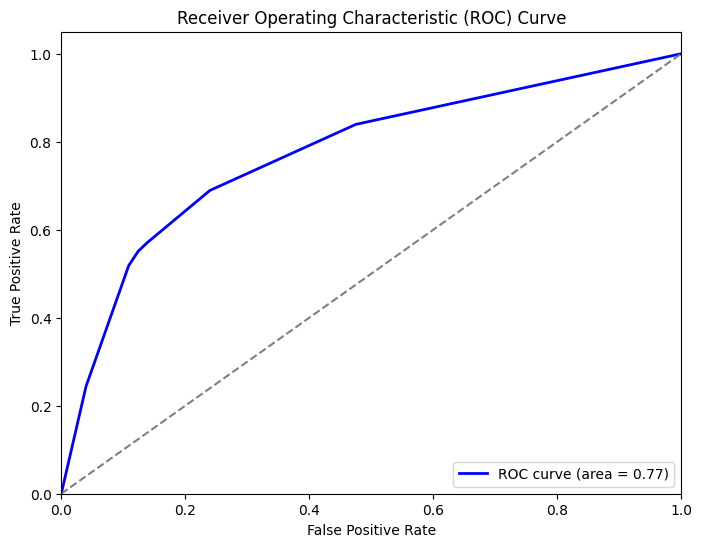

In [22]:
# Get predicted probabilities for the positive class (class 1)
y_probs = DT_clf.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the AUC (Area Under the ROC Curve)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

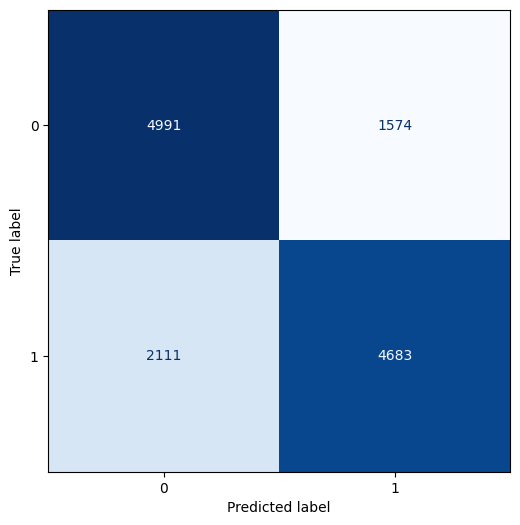

In [23]:
# display the confusion matrix
cm = confusion_matrix(results['actual'], results['predicted'])

fig, ax = plt.subplots(figsize=(8, 6))

ConfusionMatrixDisplay.from_predictions(
    results['actual'], results['predicted'], display_labels=DT_clf.classes_, ax=ax, colorbar=False, cmap=plt.cm.Blues
)

plt.show()

In [24]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nAccuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))


Accuracy: 0.72
Precision: 0.75
Recall: 0.69
F1-Score: 0.72


###Decision Tree Using Grid Search

In [25]:
# Using grid search over a range of hyperparameters and finds the best combination that maximizes accuracy
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 6, 9, 10],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_DT_clf = grid_search.best_estimator_

In [26]:
# Assuming you have a set of test data X_test and corresponding labels y_test
y_pred = best_DT_clf.predict(X_test)
results = pd.DataFrame()
results['actual'] = y_test
results['predicted'] = best_DT_clf.predict(X_test)
results


,actual,predicted
29673,0,0
14770,0,0
24701,1,1
61302,1,1
50641,0,0
...,...,...
44083,1,0
11920,1,1
36798,1,1
59458,1,1


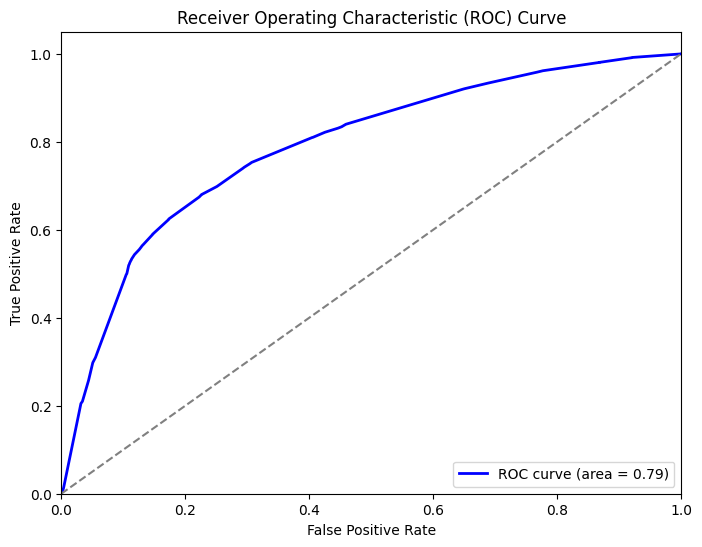

In [27]:
# Get predicted probabilities for the positive class (class 1)
y_probs = best_DT_clf.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the AUC (Area Under the ROC Curve)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

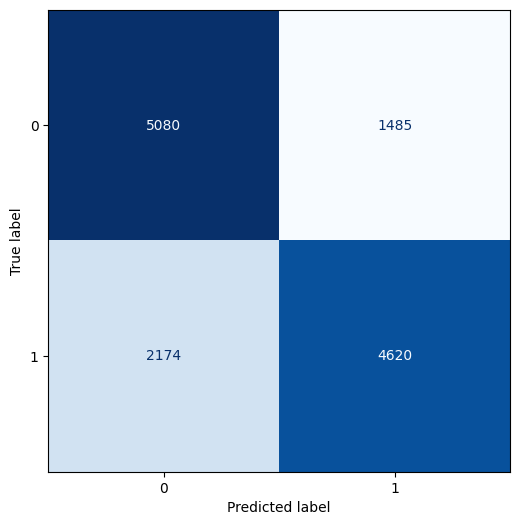

In [28]:
# display the confusion matrix
cm = confusion_matrix(results['actual'], results['predicted'])

fig, ax = plt.subplots(figsize=(8, 6))

ConfusionMatrixDisplay.from_predictions(
    results['actual'], results['predicted'], display_labels=best_DT_clf.classes_, ax=ax, colorbar=False, cmap=plt.cm.Blues
)

plt.show()

In [29]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nAccuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))


Accuracy: 0.73
Precision: 0.76
Recall: 0.68
F1-Score: 0.72


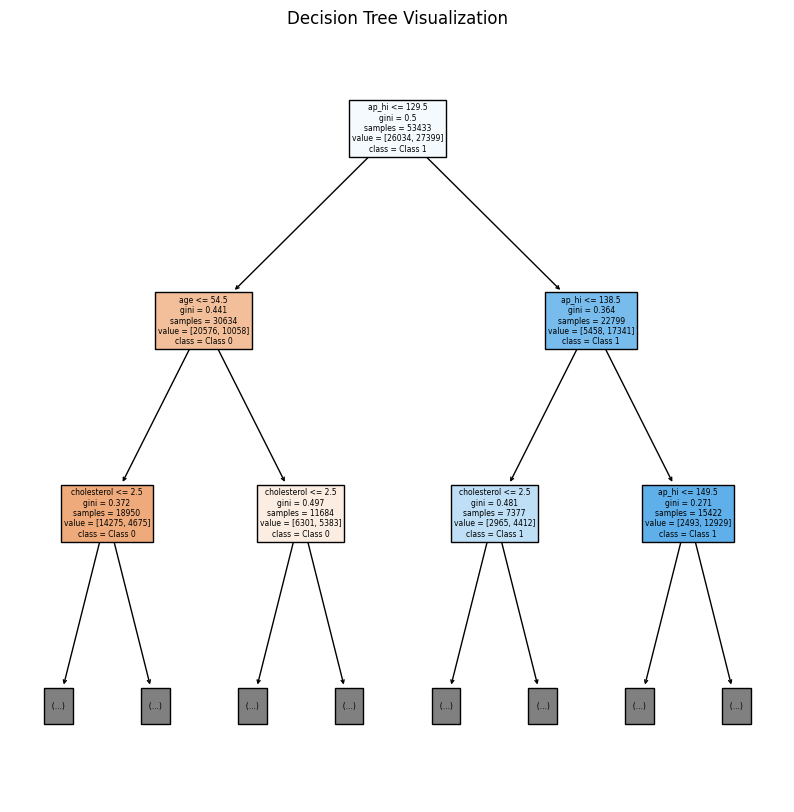

In [30]:
#Visualizing Decision Tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))  # Adjust the figure size as needed
plot_tree(best_DT_clf, filled=True, feature_names=X_train.columns, class_names=["Class 0", "Class 1"],max_depth=2)
plt.title("Decision Tree Visualization")
plt.show()

## Naive Bayes

In [31]:
NB_clf = GaussianNB()
NB_clf.fit(X_train,y_train)

GaussianNB()

In [32]:
y_pred = NB_clf.predict(X_test)
results = pd.DataFrame()
results['actual'] = y_test
results['predicted'] = NB_clf.predict(X_test)
results

,actual,predicted
29673,0,0
14770,0,0
24701,1,0
61302,1,1
50641,0,0
...,...,...
44083,1,0
11920,1,1
36798,1,1
59458,1,1


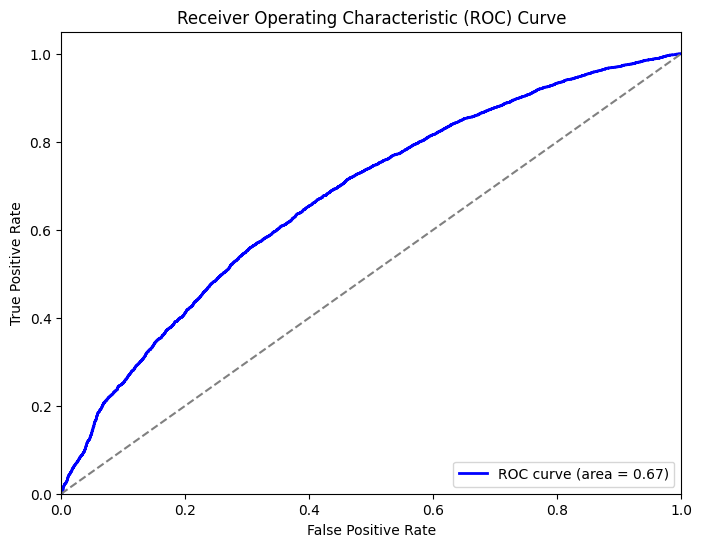

In [33]:
# Get predicted probabilities for the positive class (class 1)
y_probs = NB_clf.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the AUC (Area Under the ROC Curve)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

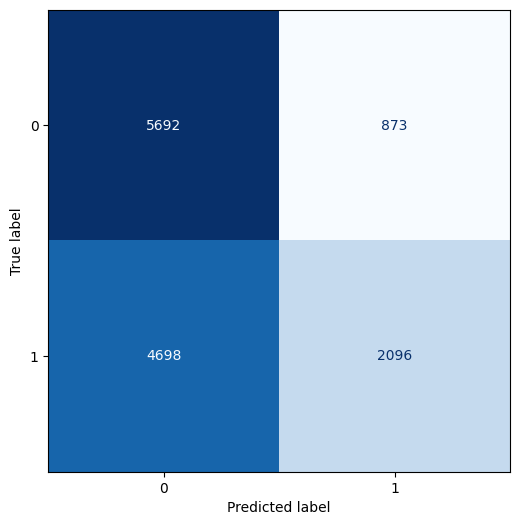

In [34]:
# display the confusion matrix
cm = confusion_matrix(results['actual'], results['predicted'])

fig, ax = plt.subplots(figsize=(8, 6))

ConfusionMatrixDisplay.from_predictions(
    results['actual'], results['predicted'], display_labels=NB_clf.classes_, ax=ax, colorbar=False, cmap=plt.cm.Blues
)

plt.show()

In [35]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nAccuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))


Accuracy: 0.58
Precision: 0.71
Recall: 0.31
F1-Score: 0.43


## K Nearest Neighbor

In [36]:
K = 18 #Number of Neighbours
KNN_clf = KNeighborsClassifier(K)
KNN_clf.fit(X_train,y_train.ravel())
y_pred = KNN_clf.predict(X_test)


In [37]:
results = pd.DataFrame()
results['actual'] = y_test
results['predicted'] = KNN_clf.predict(X_test)
results

,actual,predicted
29673,0,0
14770,0,0
24701,1,1
61302,1,0
50641,0,0
...,...,...
44083,1,0
11920,1,0
36798,1,0
59458,1,1


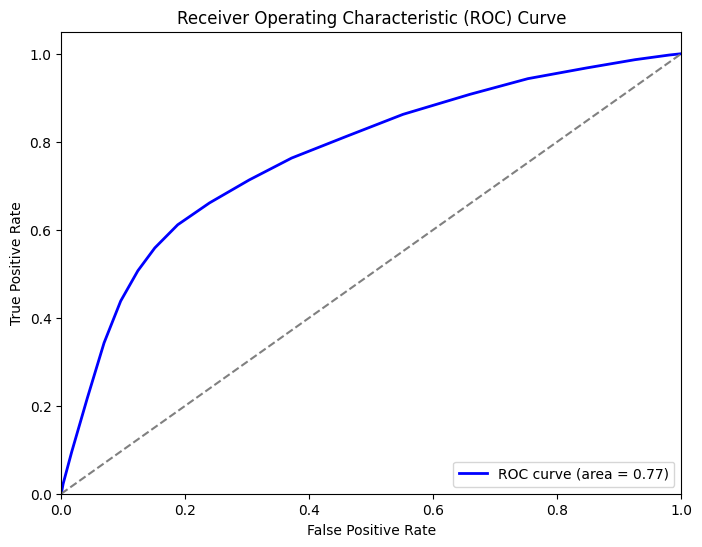

In [38]:
# Get predicted probabilities for the positive class (class 1)
y_probs = KNN_clf.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the AUC (Area Under the ROC Curve)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

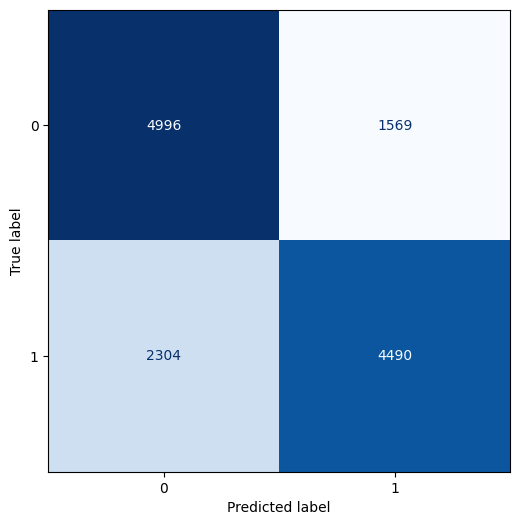

In [39]:
# display the confusion matrix
cm = confusion_matrix(results['actual'], results['predicted'])

fig, ax = plt.subplots(figsize=(8, 6))

ConfusionMatrixDisplay.from_predictions(
    results['actual'], results['predicted'], display_labels=KNN_clf.classes_, ax=ax, colorbar=False, cmap=plt.cm.Blues
)

plt.show()

In [40]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nAccuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))


Accuracy: 0.71
Precision: 0.74
Recall: 0.66
F1-Score: 0.70


### Now let's check for all the different neighbour values from 1 - 30 and select best one

In [41]:

K = 30
step = 3  # Set the step size

# Initialize a list to store accuracy values
accuracies = []

for i in range(1, K + 1, step):
    KNN_clf = KNeighborsClassifier(n_neighbors=i)
    KNN_clf.fit(X_train, y_train.ravel())
    y_pred = KNN_clf.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)

    if accuracy != 0:  # Only append non-zero accuracy values
        accuracies.append(accuracy)

# Convert the list of accuracies to a NumPy array
Acc = np.array(accuracies)

print(Acc)

[0.61845947 0.66861292 0.69413878 0.70312149 0.70619058 0.71030766
 0.70858597 0.71352646 0.71030766 0.71285276]


In [42]:
print(np.max(Acc))
print(np.min(Acc))

0.7135264615614941
0.618459465528857


In [43]:
#Now we know thst K=30 Has maximum accuracy
K = 30 #Number of Neighbours
KNN_clf = KNeighborsClassifier(K)
KNN_clf.fit(X_train,y_train.ravel())
y_pred = KNN_clf.predict(X_test)


results = pd.DataFrame()
results['actual'] = y_test
results['predicted'] = KNN_clf.predict(X_test)
results

,actual,predicted
29673,0,0
14770,0,0
24701,1,1
61302,1,0
50641,0,0
...,...,...
44083,1,0
11920,1,0
36798,1,0
59458,1,1


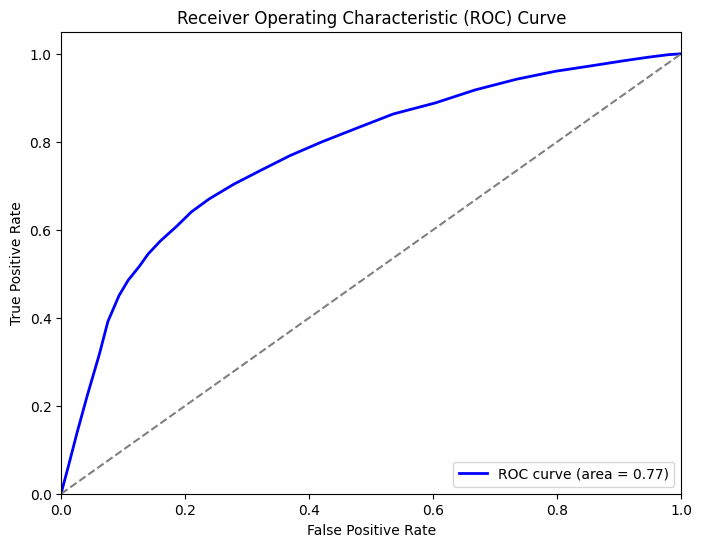

In [44]:
# Get predicted probabilities for the positive class (class 1)
y_probs = KNN_clf.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the AUC (Area Under the ROC Curve)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

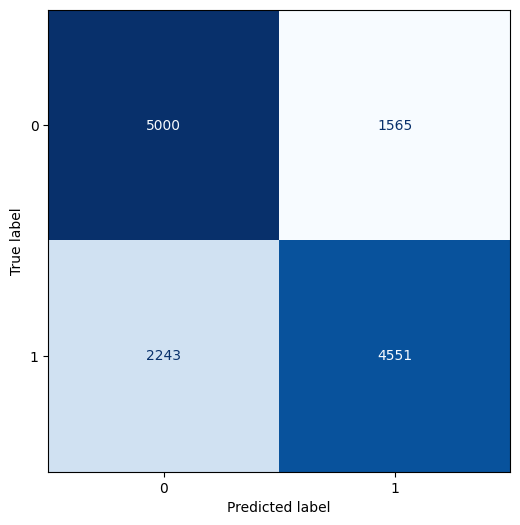

In [45]:
# display the confusion matrix
cm = confusion_matrix(results['actual'], results['predicted'])

fig, ax = plt.subplots(figsize=(8, 6))

ConfusionMatrixDisplay.from_predictions(
    results['actual'], results['predicted'], display_labels=KNN_clf.classes_, ax=ax, colorbar=False, cmap=plt.cm.Blues
)

plt.show()

In [46]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nAccuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))


Accuracy: 0.71
Precision: 0.74
Recall: 0.67
F1-Score: 0.71


## Neural Network (MLP Classifier)

In [47]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(50, 50), activation='relu', random_state=42)

# Train the model
mlp.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp.predict(X_test)

results = pd.DataFrame()
results['actual'] = y_test
results['predicted'] = mlp.predict(X_test)
results

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,actual,predicted
29673,0,0
14770,0,0
24701,1,1
61302,1,0
50641,0,0
...,...,...
44083,1,0
11920,1,1
36798,1,1
59458,1,1


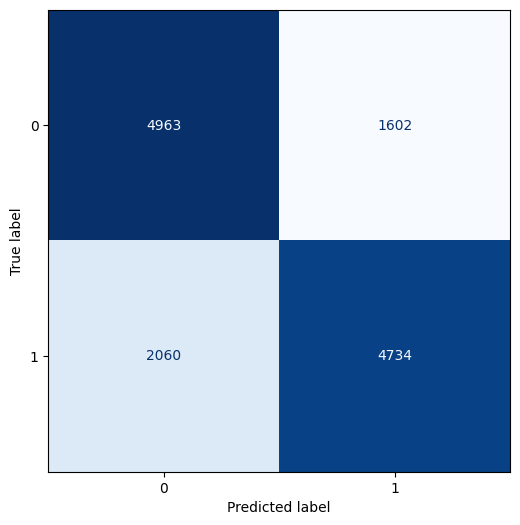

In [48]:
# display the confusion matrix
cm = confusion_matrix(results['actual'], results['predicted'])

fig, ax = plt.subplots(figsize=(8, 6))

ConfusionMatrixDisplay.from_predictions(
    results['actual'], results['predicted'], display_labels=mlp.classes_, ax=ax, colorbar=False, cmap=plt.cm.Blues
)

plt.show()

In [49]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print("\nAccuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))


Accuracy: 0.73
Precision: 0.75
Recall: 0.70
F1-Score: 0.72


In [51]:
accuracy_scores = {
    'Decision Tree': 0.73,
    'Naive Bayes': 0.58,
    'K-Nearest Neighbors': 0.71,
    'Multi-Layer Perceptron': 0.73
}

# Create a table using pandas
accuracy_df = pd.DataFrame(list(accuracy_scores.items()), columns=['Model', 'Accuracy'])

# Print the table with boundaries
table = tabulate(accuracy_df, headers='keys', tablefmt='pretty', showindex=False)
print(table)

+------------------------+----------+
|         Model          | Accuracy |
+------------------------+----------+
|     Decision Tree      |   0.73   |
|      Naive Bayes       |   0.58   |
|  K-Nearest Neighbors   |   0.71   |
| Multi-Layer Perceptron |   0.73   |
+------------------------+----------+


####For Cardiovascular Dataset minimizing false negatives is crucial and the cost of missing a case of cardiovascular disease is high, we favor the model with fewer false negatives. In this case, the Decision Tree (1485 false negatives) would be a slightly better choice than the MLP Classifier (1602 false negatives).